In [19]:
from supernova import *
from models import *
import configparser
import re

In [2]:
# MATPLOTLIB FORMATTING
SMALL_SIZE = 14
MEDIUM_SIZE = 15
BIGGER_SIZE = 17

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams["savefig.dpi"]=600
plt.rcParams["savefig.bbox"]='tight'
plt.rc('text', usetex=False)

In [13]:
if not re.search('[a-zA-Z]', '2021'):
    print('e')

e


In [14]:
def make_dict(config_file, folder):
    '''This function parses the config file into a usable dictionary.'''

    config = configparser.ConfigParser()
    config.read(config_file)
    details_dict = {}
    details_dict['folder'] = folder

    for key, val in config.items('DEFAULT'):
        if not re.search('[a-zA-Z]', val):
            details_dict[key] = float(val)
        else:
            details_dict[key] = val
            #assert val[-3:] == 'csv', 'File must be .csv'
    return details_dict

In [16]:
fold = '2021gno'
sn2021gno = make_dict(f'{fold}/config.ini', fold)

In [20]:
PIRO_2015(sn2021gno)

KeyError: 'W2'

In [44]:
from matplotlib.ticker import (MultipleLocator)

Piro 2015 model for 2021gno simple curve fitted values:
Re = 61.92655410400258 +/- 8.848677859310634
Me = 0.017724630354914155 +/- 0.002355179994351027
Offset = 1.9449495470645502e-21 +/- 0.09584243096493708
Piro 2015 model for 2021inl simple curve fitted values:
Re = 136.32744068717915 +/- 62.881731836113794
Me = 0.024314554814777425 +/- 0.008820606160382967
Offset = 5.105970914410223e-19 +/- 0.44284405660546966
Piro 2015 model for iPTF16hgs simple curve fitted values:
Re = 47.00817486064584 +/- 7.705608038372207
Me = 0.042383366563230544 +/- 0.01658706900287286
Offset = 3.106092582488951e-14 +/- 0.6717845018976707
Sapir Waxman Red Super Giant model for 2021gno simple curve fitted values:
Re = 33.860794322233964 +/- 2.6427691667042086 R_Sun
Me = 0.043614506192977284 +/- 0.002113143442912325
Ve = 6865.042370390382 +/- 296.92020602498786 km/s
Offset = 0.26798064561297547 +/- 0.02243038958893887
Sapir Waxman Red Super Giant model for 2021inl simple curve fitted values:
Re = 27.7003217787

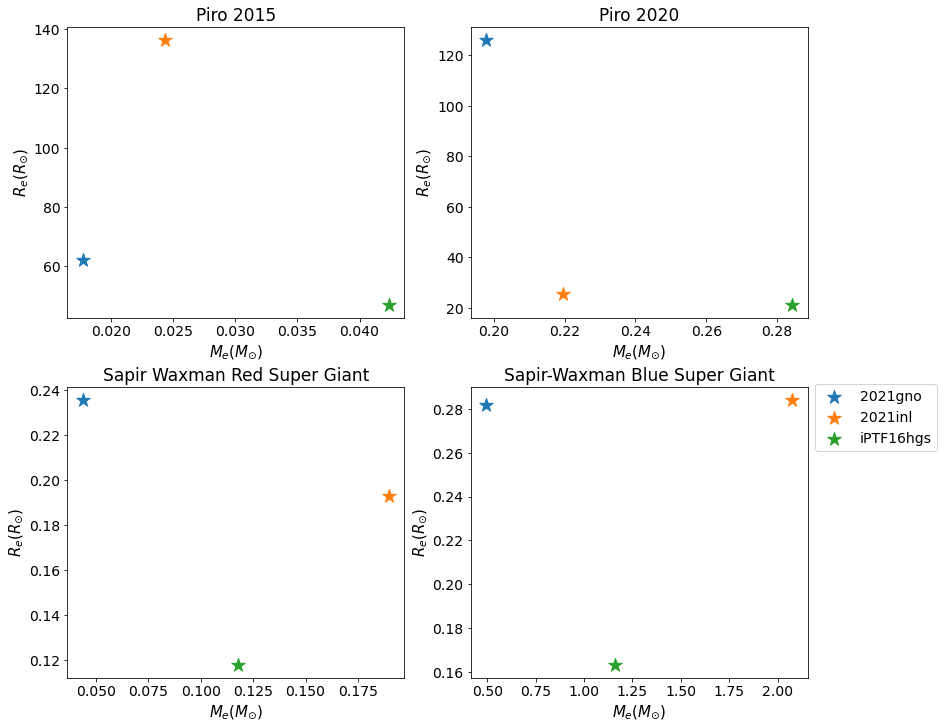

In [45]:
fig = plt.figure(constrained_layout=True,figsize=(13, 10))

gs = fig.add_gridspec(2,4,wspace=0,hspace=0, figure=fig)
ax1 = plt.subplot(gs[0, :2])
ax2 = plt.subplot(gs[0, 2:])

ax3 = plt.subplot(gs[1, 0:2])
ax4 = plt.subplot(gs[1, 2:])

axe = [ax1, ax2, ax3, ax4]

targets = ['2021gno', '2021inl', 'iPTF16hgs']
models = [PIRO_2015, PIRO_2020, SW_RSG, SW_BSG]
for i in range(4):
    mod = models[i]
    for t in targets:

        det_dict = make_dict(f'{t}/config.ini', t)
        mod_obj = mod(det_dict)
        mod_obj.get_curvefit_values()
        re, me = mod_obj.get_sc_RE()[0], mod_obj.get_sc_ME()[0]
        axe[i].scatter(me, re, s=200, marker = '*', label=mod_obj.folder)
    axe[i].set_title(mod_obj.name)
    axe[i].set_xlabel('$M_e (M_{\odot})$')
    axe[i].set_ylabel('$R_e (R_{\odot})$')

    ax.xaxis.set_minor_locator(MultipleLocator(10))
    ax.xaxis.set_major_locator(MultipleLocator(10))
    #ax.xaxis.set_major_locator(MultipleLocator())

plt.legend(loc='upper left',bbox_to_anchor=(1.,1.035))
#plt.savefig('first.png', facecolor='white')
        
    

In [46]:

axs = gs.subplots()
for r in range(2):
    for c in range(2):
        
        axs[r,c].plot([], [], color=(0.7, 0.2, 0.5))

# Hide x labels and tick labels for all but bottom plot.
fig.suptitle('Mass and Radius of Shock Cooling Envelope', size=20, x=0.5, y=0.92)
fig.text(0.5, 0.04, 'Normalized Flux $f$', ha='center', size=20)
fig.text(0.04, 0.5, 'Wavelength $\AA$', va='center', rotation='vertical',size=20);

#axs[1].set_ylabel("Normalized Flux $f$", loc='bottom')


# for ax in axs[:]:
#     ax.label_outer()
#plt.savefig('q4.pdf', bbox_inches='tight')